In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [5]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

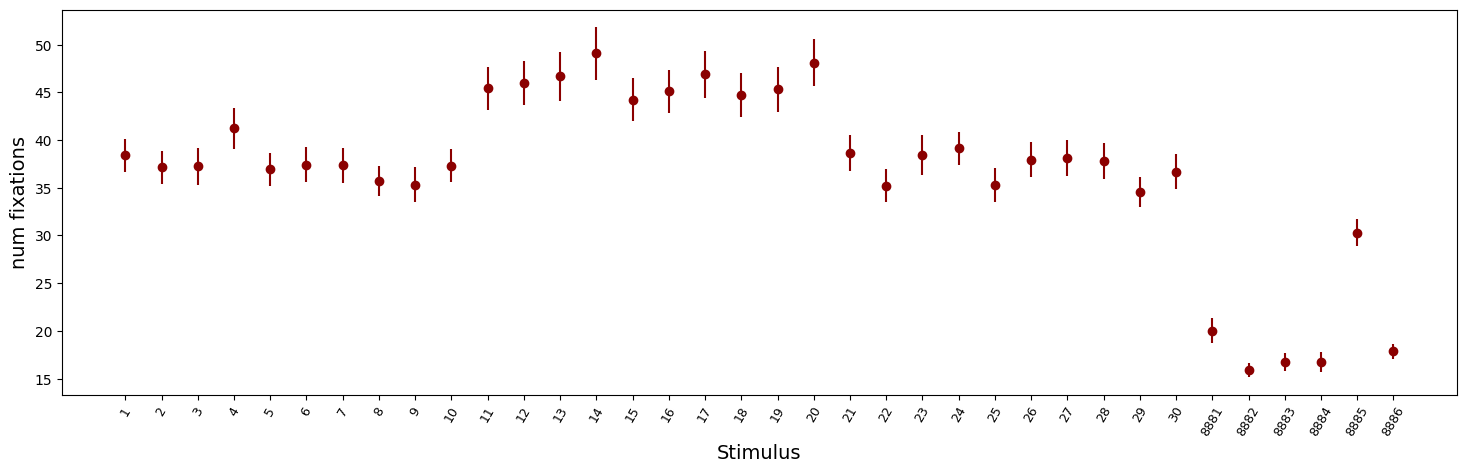

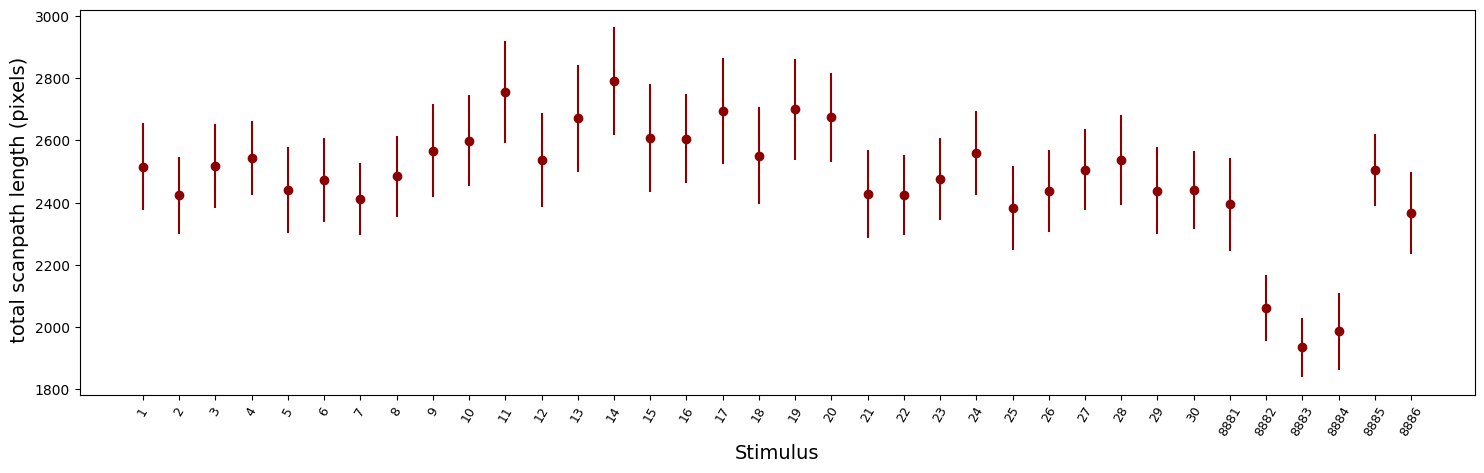

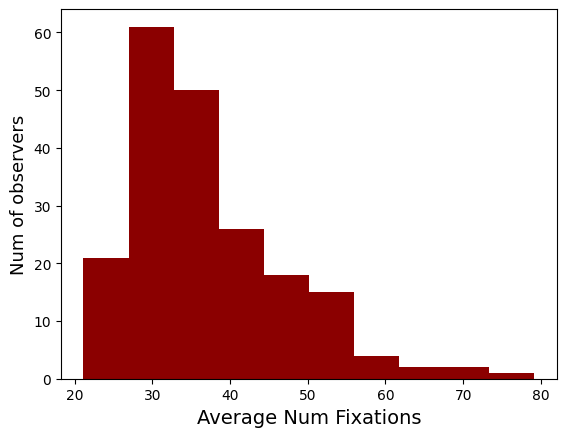

In [6]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [106]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        subject_with_missing_data[np.where(np.isnan(FixGr))[0][0]] = +1
        set_subj.add(np.where(np.isnan(FixGr))[0][0])


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
20 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 91: 1, 32: 1, 20: 1, 55: 1, 17: 1, 44: 1, 14: 1, 2: 1, 66: 1, 73: 1, 15: 1, 25: 1, 64: 1, 8: 1, 27: 1, 41: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [20]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [21]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [22]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entr

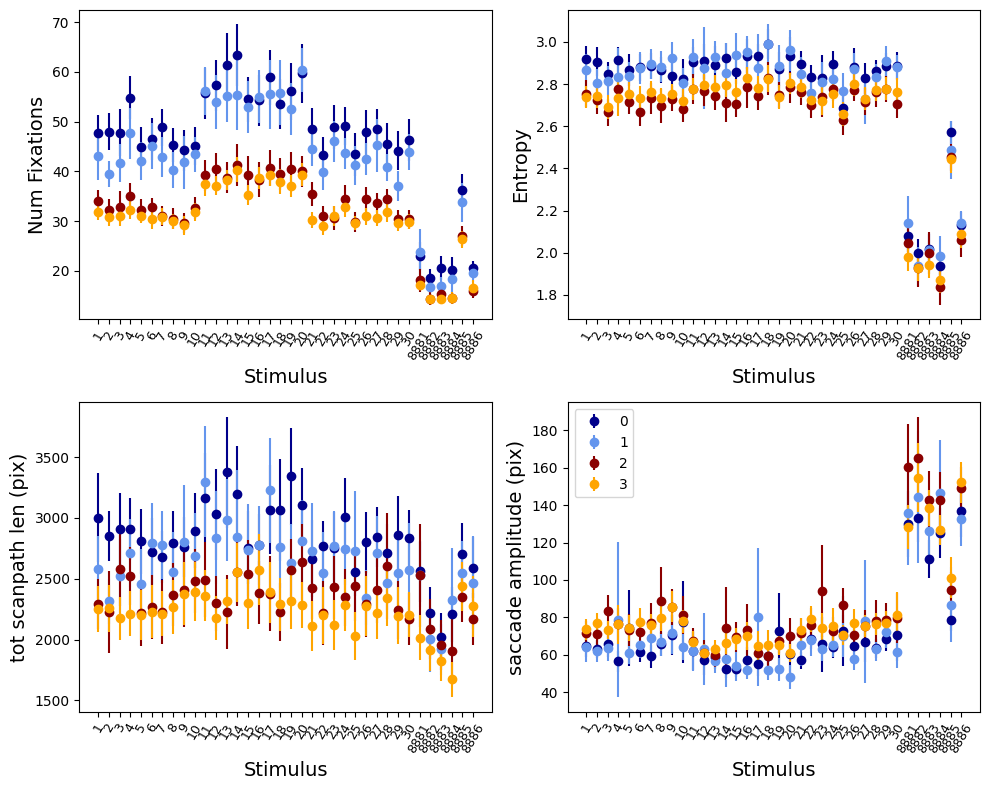

In [24]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [25]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [26]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [27]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [29]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



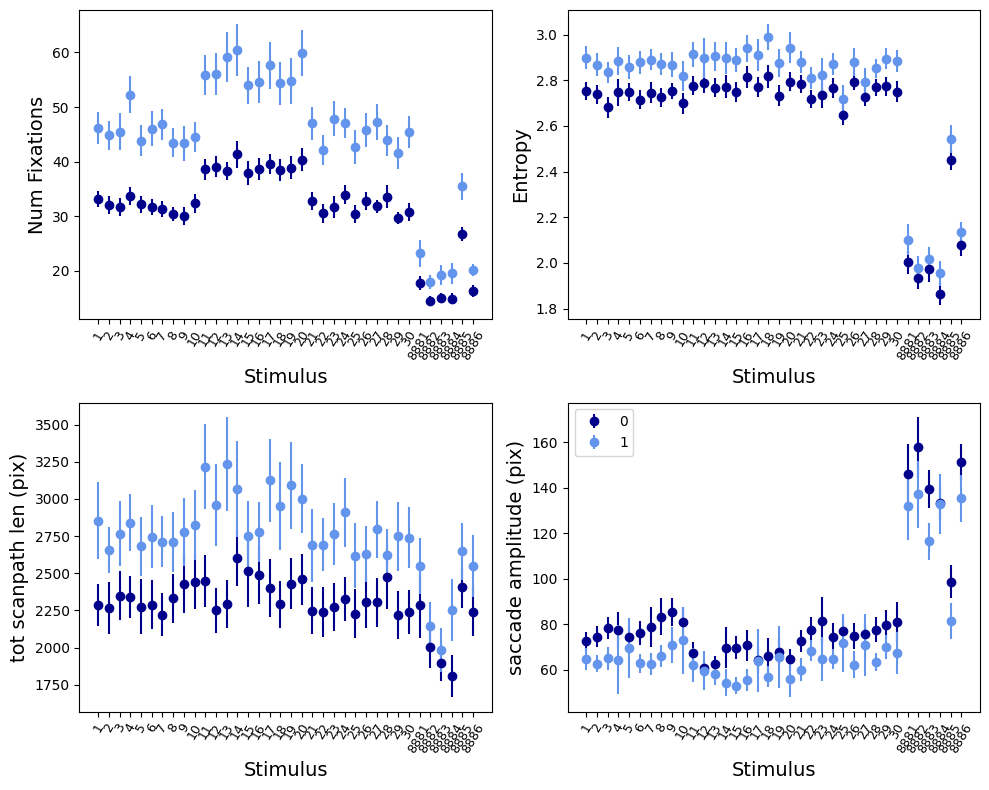

In [30]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [36]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [37]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

Group 0
Angle Entropy: 5.300665888293087
---------------------------------------------------------
Group 1
Angle Entropy: 5.574313088989643
---------------------------------------------------------
 
t-test between groups 0 and 1
t: 1.8889771849745922, p: 0.058935654874883454
 


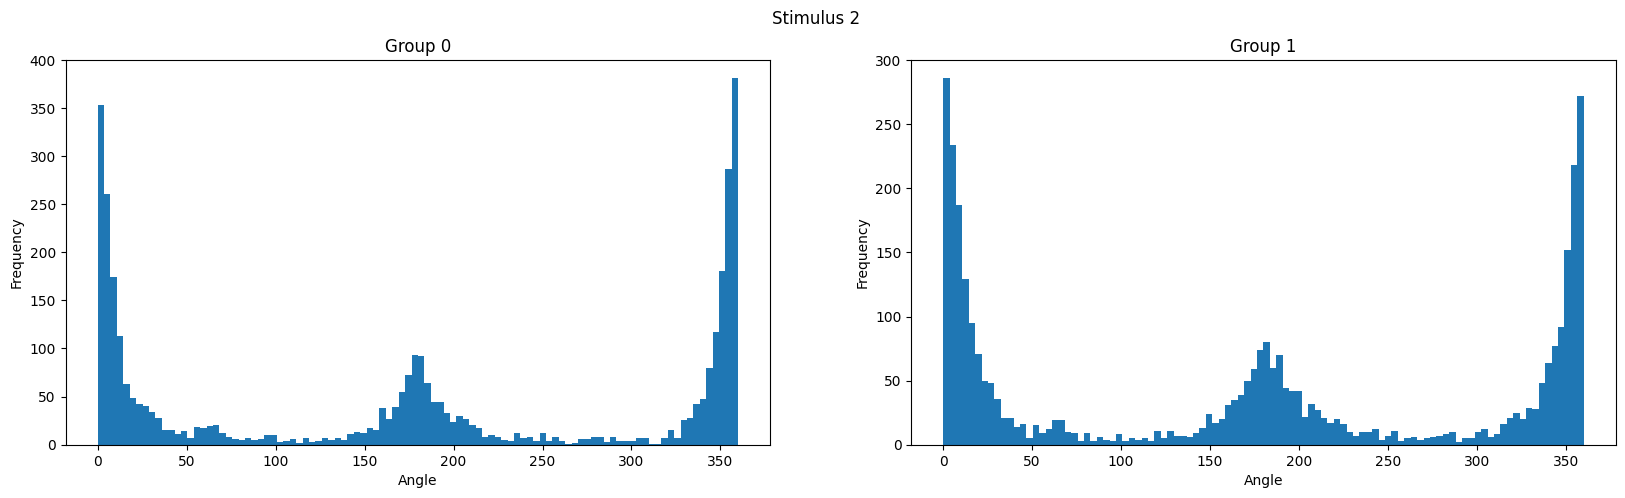

Group 0
Angle Entropy: 5.166371831024445
---------------------------------------------------------
Group 1
Angle Entropy: 5.553059863382742
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.132299311053743, p: 0.2575459996833067
 


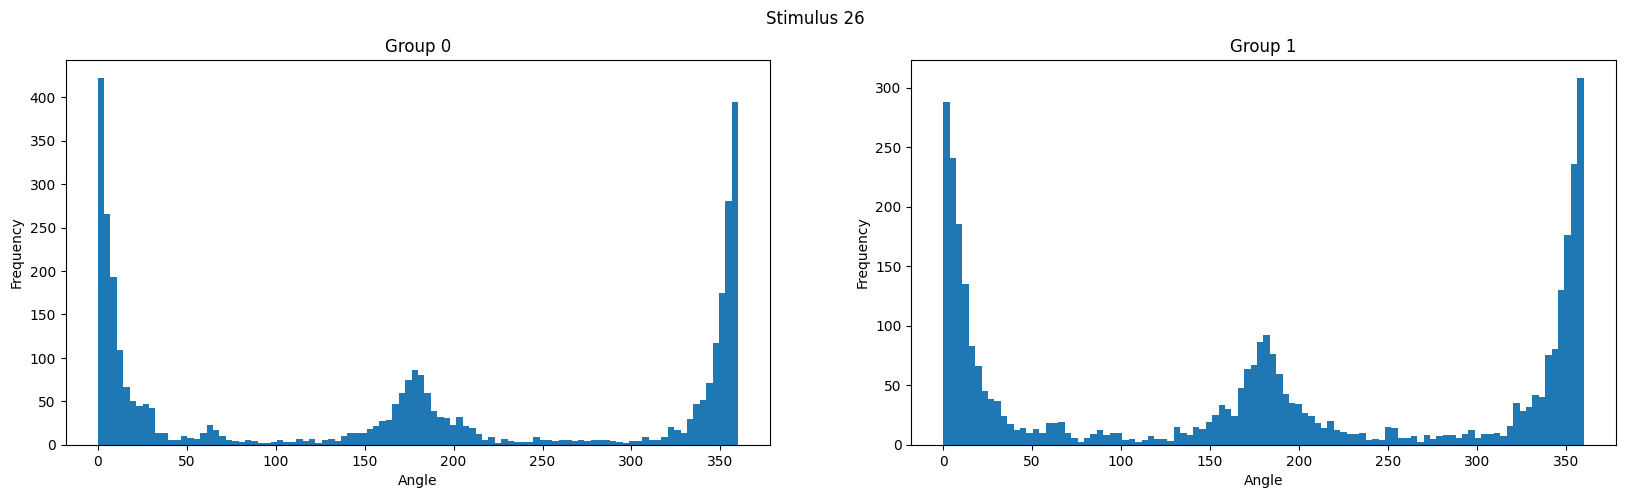

Group 0
Angle Entropy: 5.709031720090686
---------------------------------------------------------
Group 1
Angle Entropy: 5.812847361787927
---------------------------------------------------------
 
t-test between groups 0 and 1
t: 0.44775203063674485, p: 0.6543585221216373
 


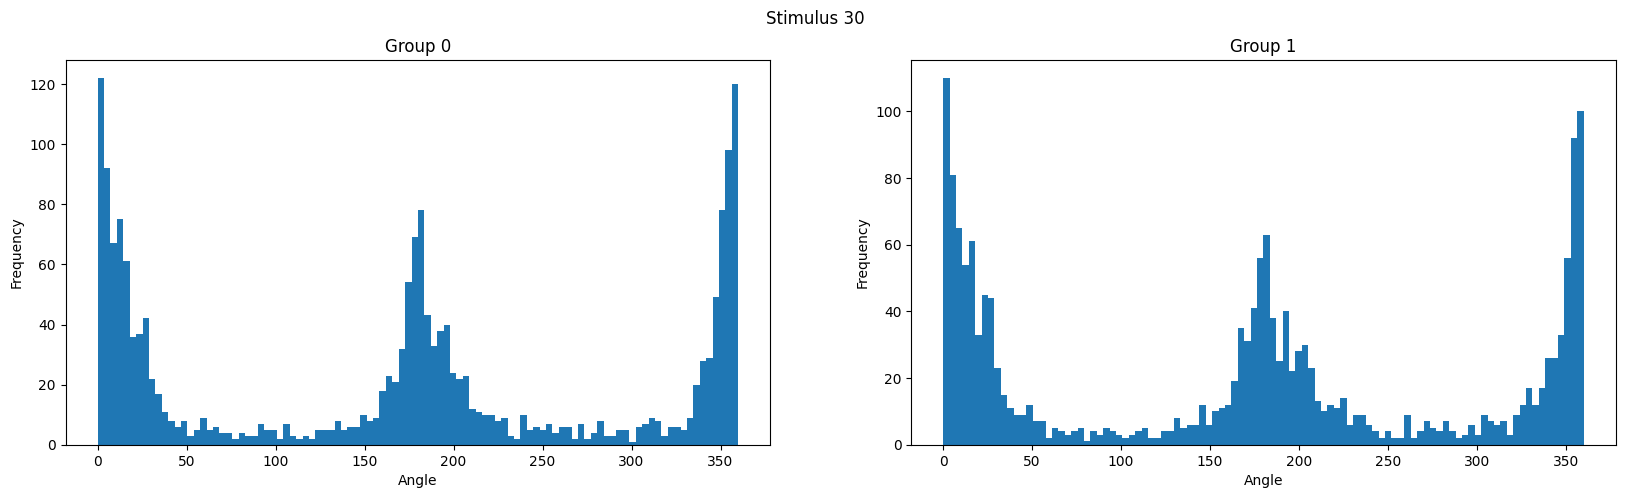

In [38]:
from scipy.stats import ttest_ind
for i, stim in enumerate([2, 26, 30]):
    # for every group of subjects show a histogram with the distribution of the saccades angles
    groups = np.unique(WhichC)
    group_saccades = []
    for group in groups:
        # from Saccades[subject, :,:] get only the subjects that are in the group
        group_saccades.append(Saccades[WhichC == group, stim, :, :])

    fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')
    groupped_angles = []
    for j, group in enumerate(group_saccades):
        angles = []
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        angles.append(val)
        groupped_angles.append(angles)
        print(f'Group {groups[j]}')
        print(f'Angle Entropy: {angles_entropy(angles, 100)}')
        print(f'---------------------------------------------------------')
        ax[j].hist(angles, bins=100)
        ax[j].set_title(f'Group {groups[j]}')
        ax[j].set_xlabel('Angle')
        ax[j].set_ylabel('Frequency')
    print(' ')
    print(f't-test between groups {groups[0]} and {groups[1]}')
    t, p = ttest_ind(groupped_angles[0], groupped_angles[1])
    print(f't: {t}, p: {p}')
    print(' ')
    plt.show()


In [41]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

In [53]:
from sklearn.preprocessing import StandardScaler

def vectorize(SimAndFeatureVals):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
from PyEyeSim import test
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(4, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

tot_subj = len(MunichSubs_Idx)
labels = np.array([WhichCN[sub] for sub in MunichSubs_Idx])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    with io.capture_output() as _:
        #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj))
    vector_roi = vectorize(SimAndFeatureVals)
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    with io.capture_output() as _:
        #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
    vector_roi = vectorize(SimAndFeatureVals)
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6987417340278625
Epoch 5 loss: 0.6251329779624939
Epoch 10 loss: 0.6039105653762817
Epoch 15 loss: 0.5883285999298096
Epoch 0 loss: 0.7519596815109253
Epoch 5 loss: 0.6094505190849304
Epoch 10 loss: 0.5734124779701233
Epoch 15 loss: 0.5652734637260437
Epoch 0 loss: 0.7345123291015625
Epoch 5 loss: 0.6628328561782837
Epoch 10 loss: 0.6548232436180115
Epoch 15 loss: 0.6390843987464905
Epoch 0 loss: 0.738918125629425
Epoch 5 loss: 0.6527847647666931
Epoch 10 loss: 0.6153562664985657
Epoch 15 loss: 0.6038174033164978
Epoch 0 loss: 0.7045061588287354
Epoch 5 loss: 0.5855401754379272
Epoch 10 loss: 0.5659323930740356
Epoch 15 loss: 0.558406412601471
Average accuracy: 0.6586956521739131
Standard deviation: 0.14290527514530812
Total confusion matrix:
[[38. 21.]
 [19. 39.]]
False positives: 21.0
False negatives: 19.0


In [110]:
list(set_subj)

[2, 8, 10, 14, 15, 17, 20, 25, 27, 32, 41, 43, 44, 53, 55, 64, 66, 73, 91, 115]

In [129]:
#stimuli = [3, 13, 25, 34]
stimuli = [3, 13]

In [137]:
from sklearn.preprocessing import StandardScaler

def vectorize(SimAndFeatureVals , vec):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [139]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj))
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)
    
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6770622134208679
Epoch 5 loss: 0.5081648826599121
Epoch 10 loss: 0.48839837312698364
Epoch 15 loss: 0.48438870906829834
Epoch 0 loss: 0.6914269328117371
Epoch 5 loss: 0.5721946358680725
Epoch 10 loss: 0.53465735912323
Epoch 15 loss: 0.5162839293479919
Epoch 0 loss: 0.6851297616958618
Epoch 5 loss: 0.5230414867401123
Epoch 10 loss: 0.5057061314582825
Epoch 15 loss: 0.4993005394935608
Epoch 0 loss: 0.7348050475120544
Epoch 5 loss: 0.665335476398468
Epoch 10 loss: 0.6215838193893433
Epoch 15 loss: 0.6065043210983276
Epoch 0 loss: 0.7419906854629517
Epoch 5 loss: 0.6858144998550415
Epoch 10 loss: 0.6692900657653809
Epoch 15 loss: 0.6583437919616699
Average accuracy: 0.7510526315789473
Standard deviation: 0.11931939956927963
Total confusion matrix:
[[33. 12.]
 [12. 40.]]
False positives: 12.0
False negatives: 12.0


---

In [141]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [142]:
def GlobalFeature(self, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in self.GetSaccades()[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features  

In [146]:
GlobalFeature_array = []
for  stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, stim))

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler

def vectorize(SimAndFeatureVals, subj, stim, vec):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 406))
    for subj, subj_id in enumerate(subj):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[subj][400] = Features['mean_fixation_duration']
        vector_roi[subj][401] = Features['total_reading_duration']
        vector_roi[subj][402] = Features['regression']
        vector_roi[subj][403] = Features['progression/regression']
        vector_roi[subj][404] = SimsVals[subj][0][0][0]
        vector_roi[subj][405] = SimsVals[subj][0][0][2]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(806, 403)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(403, 202)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(202, 101)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(101, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method='peak180', match=True, nosubj=list(remove_subj))
        vector_roi = vectorize(SimAndFeatureVals, stim=stim, vec=vector_roi)
    
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, stim=stim, vec=vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.8)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')